In [39]:
# Parameters - Constants
TRAIN_FRACTION = 0.7

RANDOM_SEED = 86720

CV_VALIDATE_SPLIT = 5

MAX_TREE_DEPTH = 20

In [40]:
# Libraries to import
import re
import numpy as np
import pandas as pd

from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from mlxtend.evaluate import bias_variance_decomp
from sklearn.model_selection import StratifiedKFold


import matplotlib
from matplotlib import pyplot as plt


# font set for graphs
font = {'family' : 'arial',
        'weight' : 'bold',
        'size'   : 22}
matplotlib.rc('font', **font)


In [41]:
# Read Data into raw data
raw_data = pd.read_csv(r"..\..\data\diabetes\diabetes.csv")

In [42]:
classification = 'Outcome'
features = list(raw_data.columns)
features.remove(classification)

In [43]:
# Split into train and test
training_data = raw_data.sample(frac=TRAIN_FRACTION,random_state=RANDOM_SEED)
training_class = training_data.loc[:,classification].values
training_features = training_data.loc[:,features].values


test_data = raw_data.drop(index=training_data.index)
test_class = test_data.loc[:,classification].values
test_features = test_data.loc[:,features].values

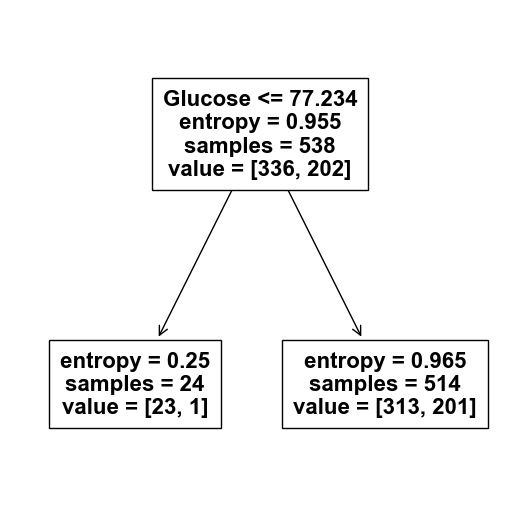

In [44]:
depth = 1
criterion = 'entropy'
splitter = 'random'
entropy_depth1_random_tree =  DecisionTreeClassifier(random_state=RANDOM_SEED,
                                                     criterion=criterion,
                                                     max_depth=depth,
                                                     splitter=splitter)

entropy_depth1_random_tree.fit(training_features,training_class)

fig=plt.figure(figsize=[5,5])
ax=fig.add_axes([0,0,1,1])
txt=tree.plot_tree(entropy_depth1_random_tree,fontsize=8,proportion=False,ax=ax)
ycollect=[]
sign=1
for tx in txt:
    val = tx.get_text()
    num = re.search(r'x\[(\d+)\]',val) 
    if(num is not None): 
        num=int(num.group()[2:-1])
        tx.set_text(tx.get_text().replace(f'x[{num}]',training_data.columns[num]))
    tx.set_fontsize(16)
plt.savefig('Plots/Random_Depth1_Entropy_Metric_tree.svg',format='svg')
plt.show()

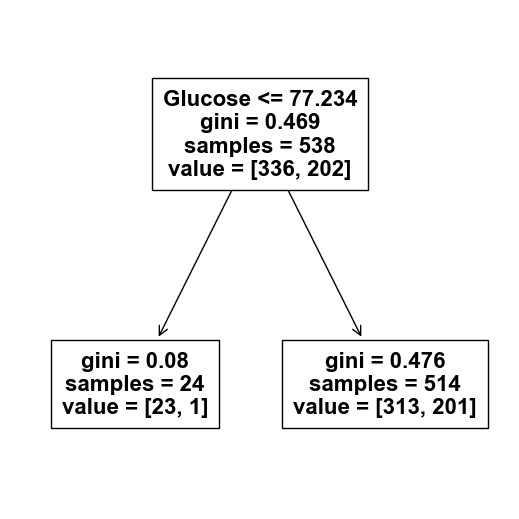

In [45]:
depth = 1
criterion = 'gini'
splitter = 'random'
gini_depth1_random_tree =  DecisionTreeClassifier(random_state=RANDOM_SEED,
                                                     criterion=criterion,
                                                     max_depth=depth,
                                                     splitter=splitter)

gini_depth1_random_tree.fit(training_features,training_class)

fig=plt.figure(figsize=[5,5])
ax=fig.add_axes([0,0,1,1])
txt=tree.plot_tree(gini_depth1_random_tree,fontsize=8,proportion=False,ax=ax)
ycollect=[]
sign=1
for tx in txt:
    val = tx.get_text()
    num = re.search(r'x\[(\d+)\]',val) 
    if(num is not None): 
        num=int(num.group()[2:-1])
        tx.set_text(tx.get_text().replace(f'x[{num}]',training_data.columns[num]))
    tx.set_fontsize(16)
plt.savefig('Plots/Random_Depth1_Gini_Metric_tree.svg',format='svg')
plt.show()

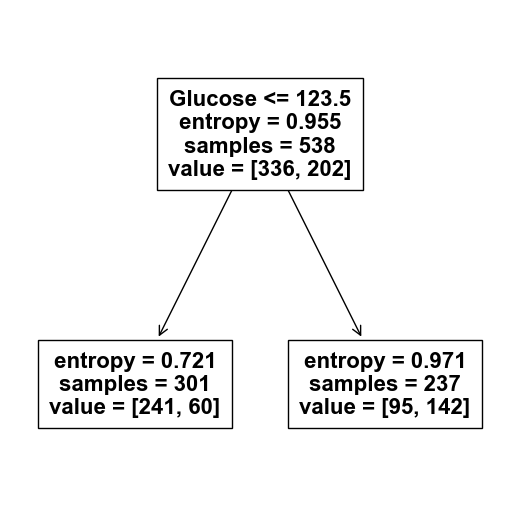

In [46]:
depth = 1
criterion = 'entropy'
splitter = 'best'
entropy_depth1_best_tree =  DecisionTreeClassifier(random_state=RANDOM_SEED,
                                                     criterion=criterion,
                                                     max_depth=depth,
                                                     splitter=splitter)

entropy_depth1_best_tree.fit(training_features,training_class)

fig=plt.figure(figsize=[5,5])
ax=fig.add_axes([0,0,1,1])
txt=tree.plot_tree(entropy_depth1_best_tree,fontsize=8,proportion=False,ax=ax)
ycollect=[]
sign=1
for tx in txt:
    val = tx.get_text()
    num = re.search(r'x\[(\d+)\]',val) 
    if(num is not None): 
        num=int(num.group()[2:-1])
        tx.set_text(tx.get_text().replace(f'x[{num}]',training_data.columns[num]))
    tx.set_fontsize(16)
plt.savefig('Plots/Best_Depth1_Entropy_Metric_tree.svg',format='svg')
plt.show()

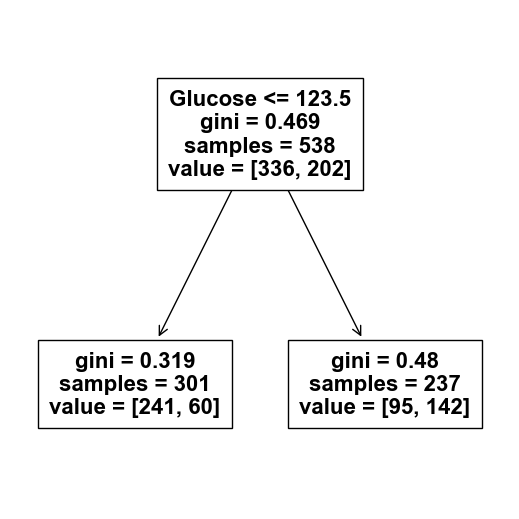

In [47]:
depth = 1
criterion = 'gini'
splitter = 'best'
gini_depth1_best_tree =  DecisionTreeClassifier(random_state=RANDOM_SEED,
                                                     criterion=criterion,
                                                     max_depth=depth,
                                                     splitter=splitter)

gini_depth1_best_tree.fit(training_features,training_class)

fig=plt.figure(figsize=[5,5])
ax=fig.add_axes([0,0,1,1])
txt=tree.plot_tree(gini_depth1_best_tree,fontsize=8,proportion=False,ax=ax)
ycollect=[]
sign=1
for tx in txt:
    val = tx.get_text()
    num = re.search(r'x\[(\d+)\]',val) 
    if(num is not None): 
        num=int(num.group()[2:-1])
        tx.set_text(tx.get_text().replace(f'x[{num}]',training_data.columns[num]))
    tx.set_fontsize(16)
plt.savefig('Plots/Best_Depth1_Gini_Metric_tree.svg',format='svg')
plt.show()

In [48]:
skf=StratifiedKFold(CV_VALIDATE_SPLIT,shuffle=True,random_state=RANDOM_SEED)

In [49]:
criterion='entropy'
depth = 2
entropy_depth2_tree = DecisionTreeClassifier(random_state=RANDOM_SEED,criterion=criterion,max_depth=depth)

cv_fold=0
scores=[]
collect_vals_predictions = []

for tr,va in skf.split(training_features,training_class):

    entropy_depth2_tree.fit(training_features[tr,:],training_class[tr])
    
    pred_test_y=entropy_depth2_tree.predict(training_features[va,:])
    proba_test_y = entropy_depth2_tree.predict_proba(training_features[va,:])

    Accuracy= 100*metrics.accuracy_score(training_class[va],pred_test_y)
    Recall=100*metrics.recall_score(training_class[va],pred_test_y)
    Precision= 100*metrics.precision_score(training_class[va],pred_test_y)
    FPR = 100*(1-metrics.recall_score(training_class[va],pred_test_y,pos_label=0))

    cv_fold=cv_fold+1

    print(f"Fold - {cv_fold}, Accuracy - {Accuracy}, Recall - {Recall}, Precision - {Precision}, FPR - {FPR}")
    collect_vals_predictions.append({'cv_fold':cv_fold,
                                    'validation':training_class[va].copy(),
                                    'model_prediction':pred_test_y,
                                    'model_probability':proba_test_y})
    scores.append([cv_fold, Accuracy, Recall, Precision, FPR])

# All the data
entropy_depth2_tree.fit(training_features,training_class)
pred_test_y=entropy_depth2_tree.predict(test_features)
proba_test_y = entropy_depth2_tree.predict_proba(test_features)

Accuracy= 100*metrics.accuracy_score(test_class,pred_test_y)
Recall=100*metrics.recall_score(test_class,pred_test_y)
Precision= 100*metrics.precision_score(test_class,pred_test_y)
FPR = 100*(1-metrics.recall_score(test_class,pred_test_y,pos_label=0))

cv_fold=0

print(f"Fold - {cv_fold}, Accuracy - {Accuracy}, Recall - {Recall}, Precision - {Precision}, FPR - {FPR}")
collect_vals_predictions.append({'cv_fold':cv_fold,
                                'validation':test_class.copy(),
                                'model_prediction':pred_test_y,
                                'model_probability':proba_test_y})
scores.append([cv_fold, Accuracy, Recall, Precision, FPR])
scores=pd.DataFrame.from_records(scores,columns=['CV_Fold','Accuracy','Recall','Precision','FPR'])
scores.to_csv('Results/Performance_Depth2_Entropy_Tree.csv')

Fold - 1, Accuracy - 75.0, Recall - 60.0, Precision - 68.57142857142857, FPR - 16.176470588235293
Fold - 2, Accuracy - 69.44444444444444, Recall - 43.90243902439025, Precision - 64.28571428571429, FPR - 14.925373134328357
Fold - 3, Accuracy - 69.44444444444444, Recall - 31.70731707317073, Precision - 72.22222222222221, FPR - 7.462686567164178
Fold - 4, Accuracy - 70.09345794392523, Recall - 30.0, Precision - 75.0, FPR - 5.970149253731338
Fold - 5, Accuracy - 72.89719626168224, Recall - 35.0, Precision - 82.35294117647058, FPR - 4.477611940298509
Fold - 0, Accuracy - 79.13043478260869, Recall - 37.878787878787875, Precision - 78.125, FPR - 4.268292682926833


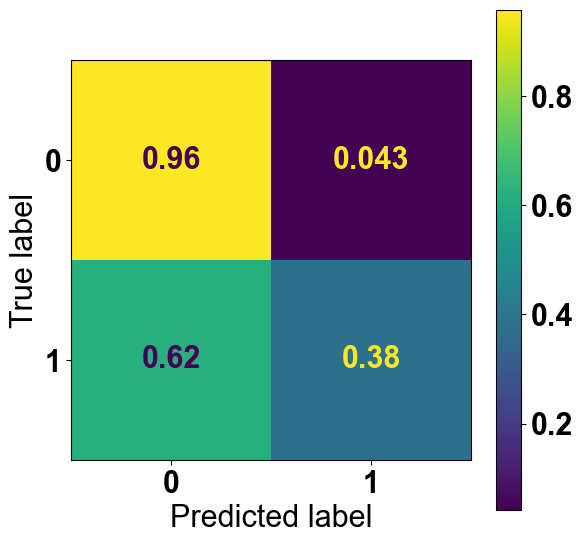

In [50]:
fig=plt.figure(figsize=[5,5])
ax = fig.add_axes([0,0,1,1])
metrics.ConfusionMatrixDisplay.from_predictions(test_class,pred_test_y,normalize='true',ax=ax)
plt.savefig('Plots/ConfusionMatrix_Depth2_Entropy.svg',format='svg')

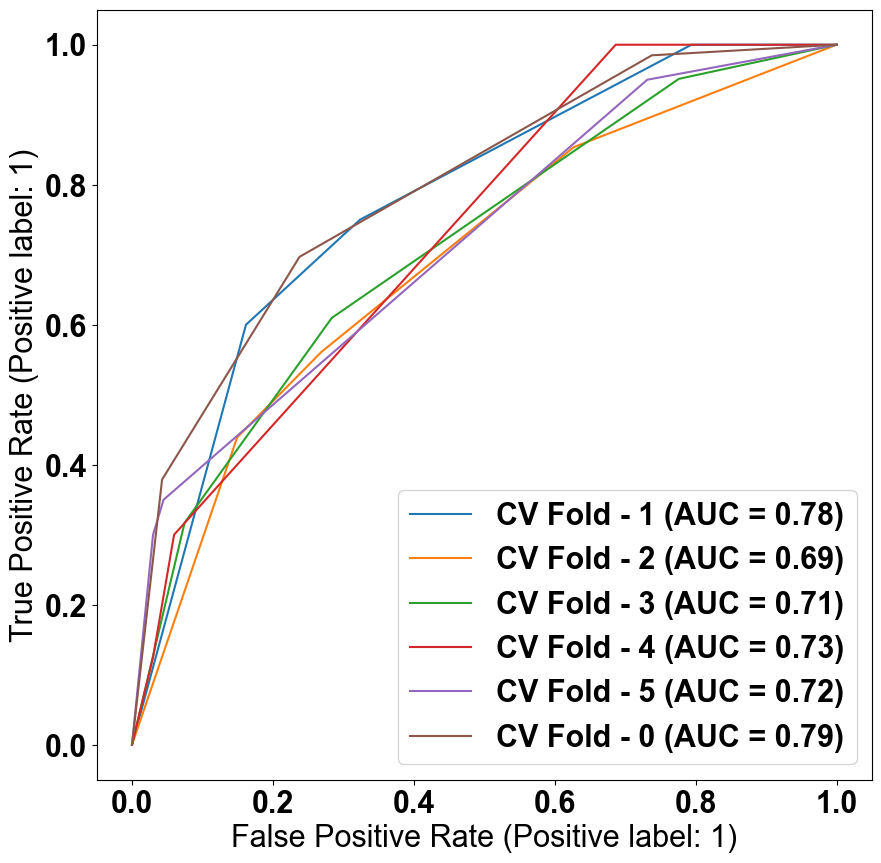

In [51]:
fig,ax=plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)
for val in collect_vals_predictions:
    label='CV Fold - %d'%(val['cv_fold'])
    rocDisplay = metrics.RocCurveDisplay.from_predictions(val['validation'],
                                                          val['model_probability'][:,1],
                                                          name=label,
                                                          ax=ax)
fig.savefig('Plots/ROC_Depth2_Entropy.svg',format='svg')

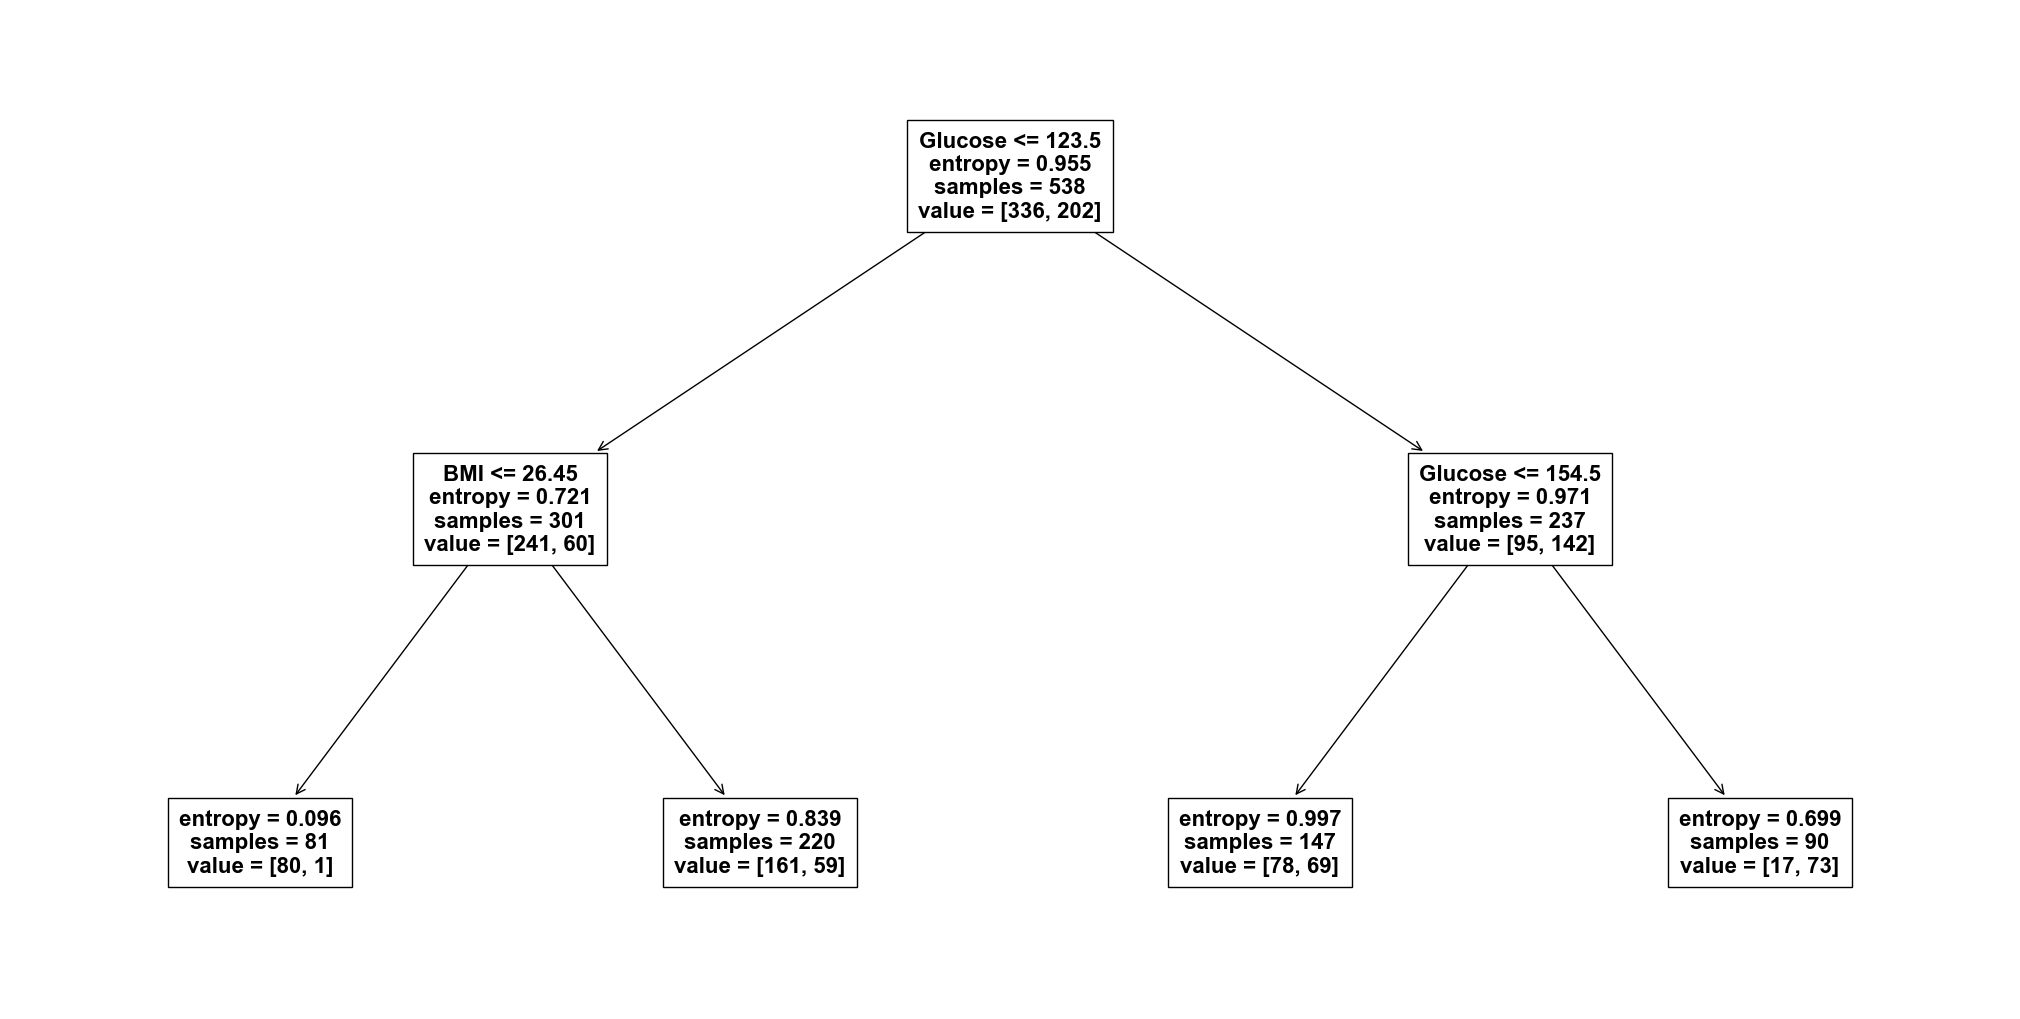

In [52]:
fig=plt.figure(figsize=[20,10])
ax=fig.add_axes([0,0,1,1])
txt=tree.plot_tree(entropy_depth2_tree,fontsize=8,proportion=False,ax=ax)
ycollect=[]
sign=1
for tx in txt:
    val = tx.get_text()
    num = re.search(r'x\[(\d+)\]',val) 
    if(num is not None): 
        num=int(num.group()[2:-1])
        tx.set_text(tx.get_text().replace(f'x[{num}]',training_data.columns[num]))
    tx.set_fontsize(16)
plt.savefig('Plots/Best_Depth2_Entropy_Metric_tree.svg',format='svg')
plt.show()

In [53]:
criterion='entropy'
depth = 4
entropy_depth4_tree = DecisionTreeClassifier(random_state=RANDOM_SEED,criterion=criterion,max_depth=depth)

cv_fold=0
scores=[]
collect_vals_predictions = []

for tr,va in skf.split(training_features,training_class):

    entropy_depth4_tree.fit(training_features[tr,:],training_class[tr])
    
    pred_test_y=entropy_depth4_tree.predict(training_features[va,:])
    proba_test_y = entropy_depth4_tree.predict_proba(training_features[va,:])

    Accuracy= 100*metrics.accuracy_score(training_class[va],pred_test_y)
    Recall=100*metrics.recall_score(training_class[va],pred_test_y)
    Precision= 100*metrics.precision_score(training_class[va],pred_test_y)
    FPR = 100*(1-metrics.recall_score(training_class[va],pred_test_y,pos_label=0))

    cv_fold=cv_fold+1

    print(f"Fold - {cv_fold}, Accuracy - {Accuracy}, Recall - {Recall}, Precision - {Precision}, FPR - {FPR}")
    collect_vals_predictions.append({'cv_fold':cv_fold,
                                    'validation':training_class[va].copy(),
                                    'model_prediction':pred_test_y,
                                    'model_probability':proba_test_y})
    scores.append([cv_fold, Accuracy, Recall, Precision, FPR])

# All the data
entropy_depth4_tree.fit(training_features,training_class)
pred_test_y=entropy_depth4_tree.predict(test_features)
proba_test_y = entropy_depth4_tree.predict_proba(test_features)

Accuracy= 100*metrics.accuracy_score(test_class,pred_test_y)
Recall=100*metrics.recall_score(test_class,pred_test_y)
Precision= 100*metrics.precision_score(test_class,pred_test_y)
FPR = 100*(1-metrics.recall_score(test_class,pred_test_y,pos_label=0))

cv_fold=0

print(f"Fold - {cv_fold}, Accuracy - {Accuracy}, Recall - {Recall}, Precision - {Precision}, FPR - {FPR}")
collect_vals_predictions.append({'cv_fold':cv_fold,
                                'validation':test_class.copy(),
                                'model_prediction':pred_test_y,
                                'model_probability':proba_test_y})
scores.append([cv_fold, Accuracy, Recall, Precision, FPR])
scores=pd.DataFrame.from_records(scores,columns=['CV_Fold','Accuracy','Recall','Precision','FPR'])
scores.to_csv('Results/Performance_Depth4_Entropy_Tree.csv')

Fold - 1, Accuracy - 71.29629629629629, Recall - 90.0, Precision - 57.14285714285714, FPR - 39.70588235294118
Fold - 2, Accuracy - 66.66666666666666, Recall - 70.73170731707317, Precision - 54.71698113207547, FPR - 35.820895522388064
Fold - 3, Accuracy - 70.37037037037037, Recall - 53.65853658536586, Precision - 62.857142857142854, FPR - 19.402985074626866
Fold - 4, Accuracy - 72.89719626168224, Recall - 75.0, Precision - 61.224489795918366, FPR - 28.358208955223883
Fold - 5, Accuracy - 71.96261682242991, Recall - 40.0, Precision - 72.72727272727273, FPR - 8.955223880597018
Fold - 0, Accuracy - 76.52173913043478, Recall - 63.63636363636363, Precision - 58.333333333333336, FPR - 18.292682926829272


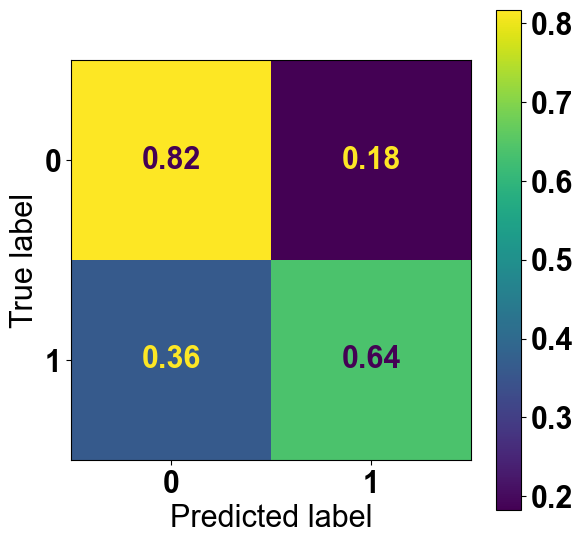

In [54]:
fig=plt.figure(figsize=[5,5])
ax = fig.add_axes([0,0,1,1])
metrics.ConfusionMatrixDisplay.from_predictions(test_class,pred_test_y,normalize='true',ax=ax)
plt.savefig('Plots/ConfusionMatrix_Depth4_Entropy.svg',format='svg')

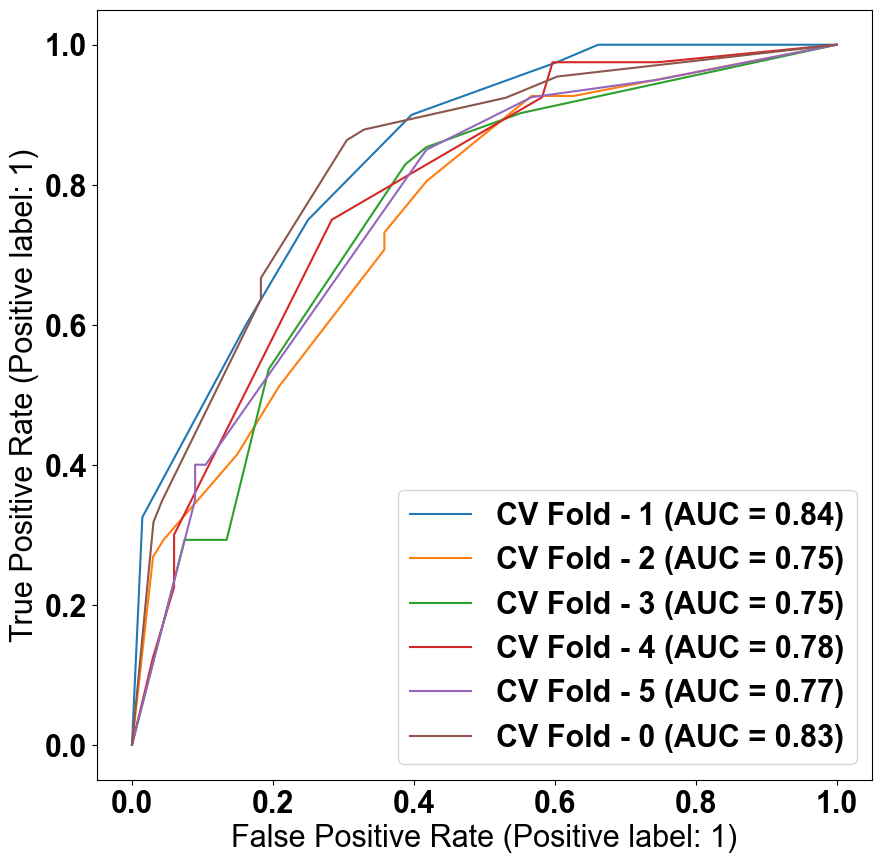

In [55]:
fig,ax=plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)
for val in collect_vals_predictions:
    label='CV Fold - %d'%(val['cv_fold'])
    rocDisplay = metrics.RocCurveDisplay.from_predictions(val['validation'],
                                                          val['model_probability'][:,1],
                                                          name=label,
                                                          ax=ax)
fig.savefig('Plots/ROC_Depth4_Entropy.svg',format='svg')

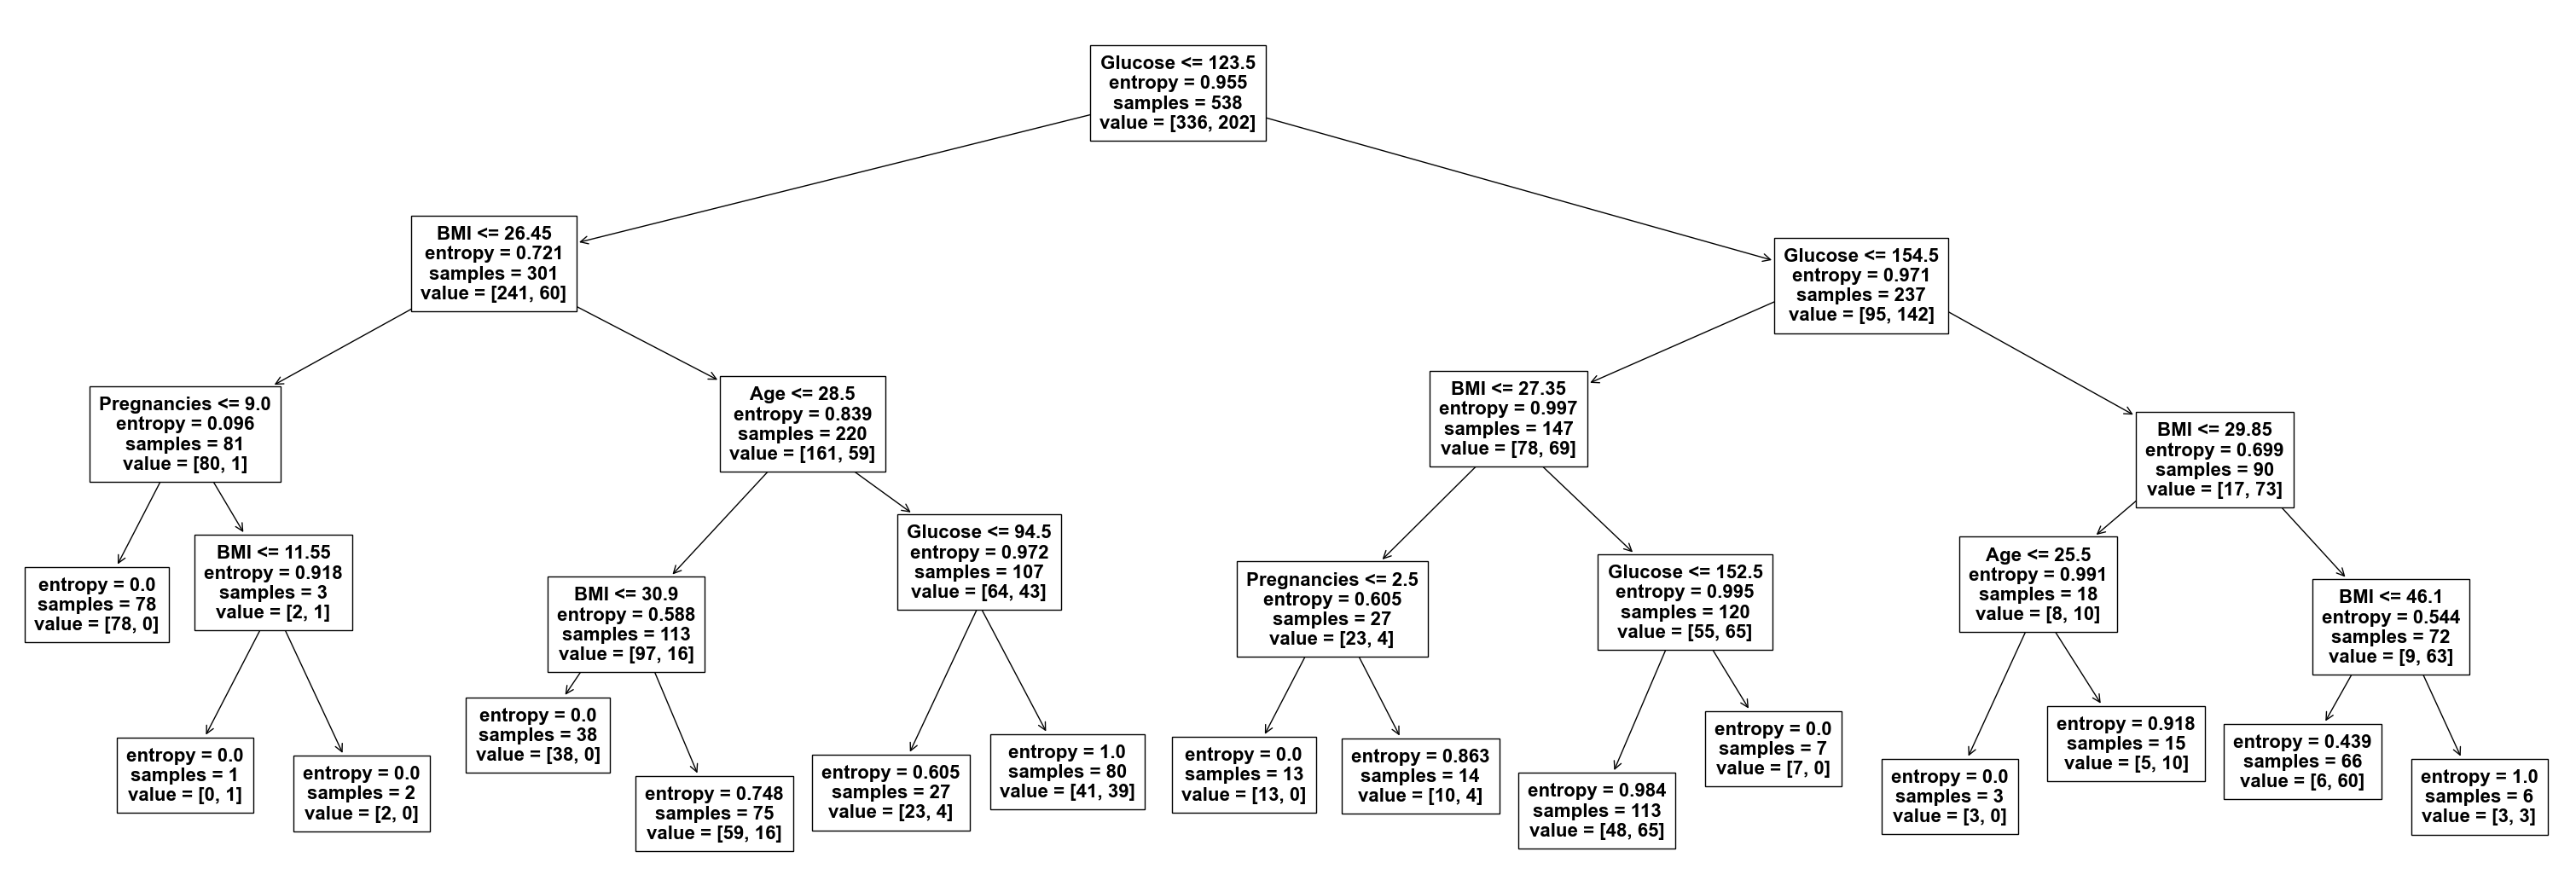

In [56]:
fig=plt.figure(figsize=[30,10])
ax=fig.add_axes([0,0,1,1])
txt=tree.plot_tree(entropy_depth4_tree,fontsize=8,proportion=False,ax=ax)
ycollect=[]
sign=1
for tx in txt:
    val = tx.get_text()
    num = re.search(r'x\[(\d+)\]',val) 
    if(num is not None): 
        num=int(num.group()[2:-1])
        tx.set_text(tx.get_text().replace(f'x[{num}]',training_data.columns[num]))
    cur_y=tx._y
    if(cur_y in ycollect):
        tx.set_y(cur_y+sign*np.random.rand()*0.05)
        sign=sign*-1
        ycollect.append(tx._y)
    else:
        ycollect.append(cur_y)
    tx.set_fontsize(16)
plt.savefig('Plots/Best_Depth4_Entropy_Metric_tree.svg',format='svg')
plt.show()

In [66]:
min_samples_leaf = 0.1313
criterion = 'entropy'
entropy_msl1313_tree = DecisionTreeClassifier(random_state=RANDOM_SEED,
                                              criterion=criterion,
                                              min_samples_leaf=min_samples_leaf)

cv_fold=0
scores=[]

collect_vals_predictions = []

for tr,va in skf.split(training_features,training_class):
    
    entropy_msl1313_tree.fit(training_features[tr,:],training_class[tr])
    pred_test_y=entropy_msl1313_tree.predict(training_features[va,:])
    proba_test_y = entropy_msl1313_tree.predict_proba(training_features[va,:])

    Accuracy= 100*metrics.accuracy_score(training_class[va],pred_test_y)
    Recall=100*metrics.recall_score(training_class[va],pred_test_y)
    Precision= 100*metrics.precision_score(training_class[va],pred_test_y)
    FPR = 100*(1-metrics.recall_score(training_class[va],pred_test_y,pos_label=0))

    cv_fold=cv_fold+1

    print(f"Fold - {cv_fold}, Accuracy - {Accuracy}, Recall - {Recall}, Precision - {Precision}, FPR - {FPR}")
    collect_vals_predictions.append({'cv_fold':cv_fold,
                                    'validation':training_class[va].copy(),
                                    'model_prediction':pred_test_y,
                                    'model_probability':proba_test_y})
    scores.append([cv_fold, Accuracy, Recall, Precision, FPR])

# All the data
entropy_msl1313_tree.fit(training_features,training_class)
pred_test_y=entropy_msl1313_tree.predict(test_features)
proba_test_y = entropy_msl1313_tree.predict_proba(test_features)

Accuracy= 100*metrics.accuracy_score(test_class,pred_test_y)
Recall=100*metrics.recall_score(test_class,pred_test_y)
Precision= 100*metrics.precision_score(test_class,pred_test_y)
FPR = 100*(1-metrics.recall_score(test_class,pred_test_y,pos_label=0))

cv_fold=0

print(f"Fold - {cv_fold}, Accuracy - {Accuracy}, Recall - {Recall}, Precision - {Precision}, FPR - {FPR}")
collect_vals_predictions.append({'cv_fold':cv_fold,
                                'validation':test_class.copy(),
                                'model_prediction':pred_test_y,
                                'model_probability':proba_test_y})
scores.append([cv_fold, Accuracy, Recall, Precision, FPR])
scores=pd.DataFrame.from_records(scores,columns=['CV_Fold','Accuracy','Recall','Precision','FPR'])
scores.to_csv('Results/Performance_MSL1313_Entropy_Tree.csv')

Fold - 1, Accuracy - 75.0, Recall - 60.0, Precision - 68.57142857142857, FPR - 16.176470588235293
Fold - 2, Accuracy - 69.44444444444444, Recall - 43.90243902439025, Precision - 64.28571428571429, FPR - 14.925373134328357
Fold - 3, Accuracy - 69.44444444444444, Recall - 31.70731707317073, Precision - 72.22222222222221, FPR - 7.462686567164178
Fold - 4, Accuracy - 68.22429906542055, Recall - 50.0, Precision - 58.82352941176471, FPR - 20.895522388059707
Fold - 5, Accuracy - 76.63551401869158, Recall - 65.0, Precision - 70.27027027027027, FPR - 16.417910447761198
Fold - 0, Accuracy - 78.26086956521739, Recall - 54.54545454545454, Precision - 64.28571428571429, FPR - 12.195121951219512


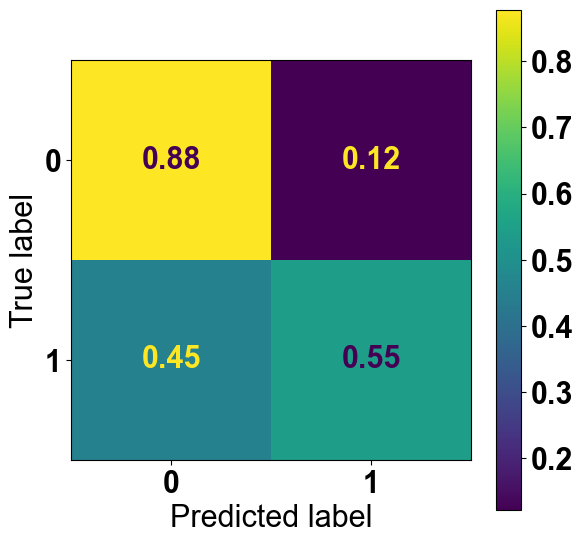

In [67]:
fig=plt.figure(figsize=[5,5])
ax = fig.add_axes([0,0,1,1])
metrics.ConfusionMatrixDisplay.from_predictions(test_class,pred_test_y,normalize='true',ax=ax)
plt.savefig('Plots/ConfusionMatrix_MSL1313_Entropy.svg',format='svg')

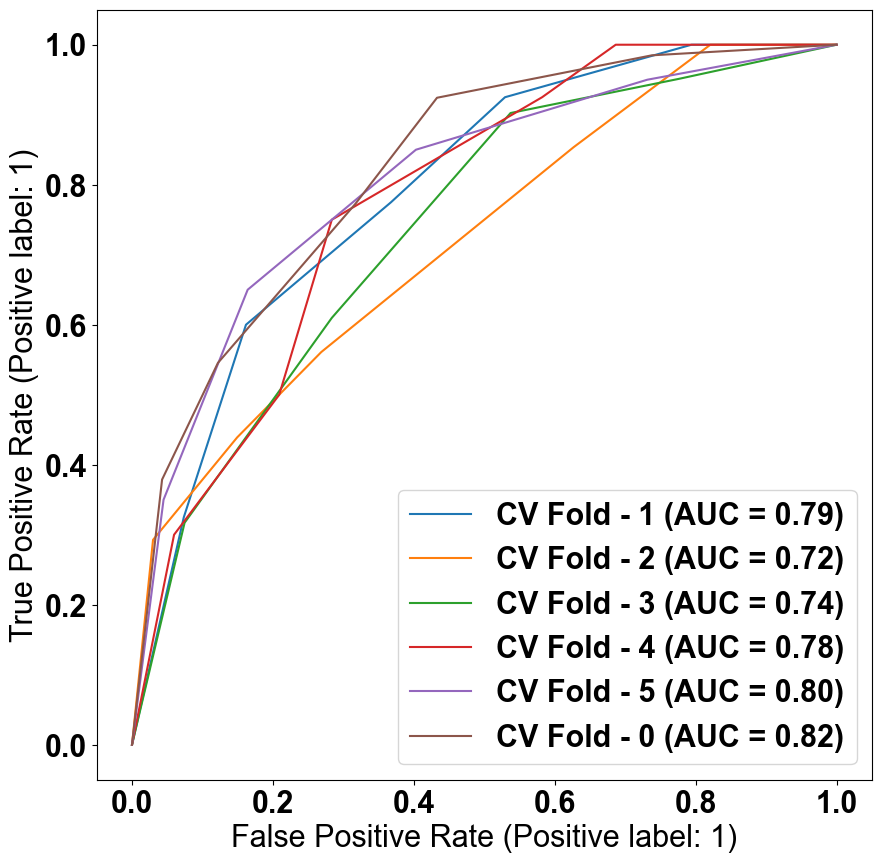

In [68]:
fig,ax=plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)
leg=[]
for val in collect_vals_predictions:
    label='CV Fold - %d'%(val['cv_fold'])
    rocDisplay = metrics.RocCurveDisplay.from_predictions(val['validation'],
                                                          val['model_probability'][:,1],
                                                          name=label,
                                                          ax=ax)
fig.savefig('Plots/ROC_MSL1313_Entropy.svg',format='svg')

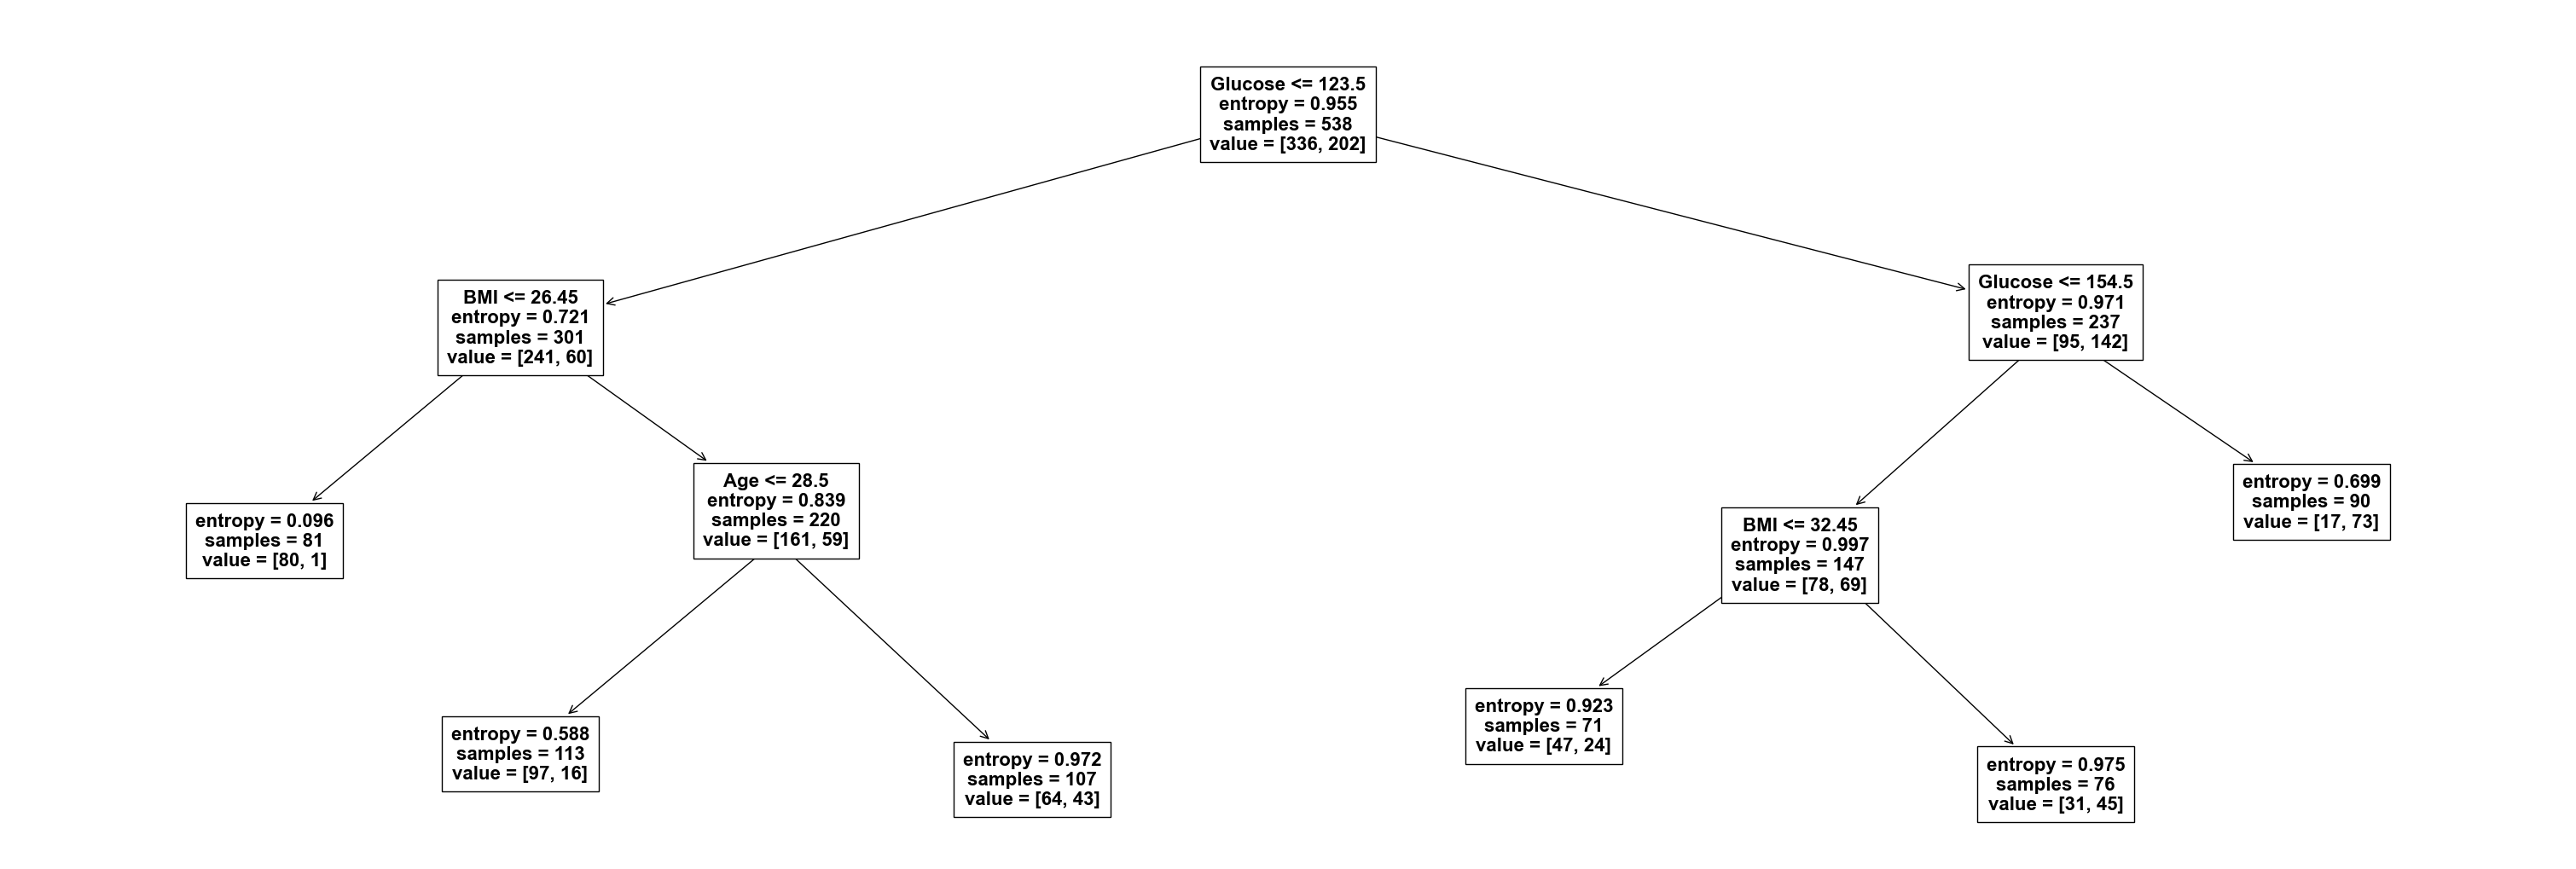

In [69]:
fig=plt.figure(figsize=[30,10])
ax=fig.add_axes([0,0,1,1])
txt=tree.plot_tree(entropy_msl1313_tree,fontsize=8,proportion=False,ax=ax)
ycollect=[]
sign=1
for tx in txt:
    val = tx.get_text()
    num = re.search(r'x\[(\d+)\]',val) 
    if(num is not None): 
        num=int(num.group()[2:-1])
        tx.set_text(tx.get_text().replace(f'x[{num}]',training_data.columns[num]))
    cur_y=tx._y
    if(cur_y in ycollect):
        tx.set_y(cur_y+sign*np.random.rand()*0.05)
        sign=sign*-1
        ycollect.append(tx._y)
    else:
        ycollect.append(cur_y)
    tx.set_fontsize(16)
plt.savefig('Plots/Best_MSL1313_Entropy_Metric_tree.svg',format='svg')
plt.show()